<a href="https://colab.research.google.com/github/maha022000/MAHALAKSHMI/blob/Data-science--projects/Data_preprocessing_(categorical_%2Cexponential_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Problem Statement: Data Pre-Processing (Categorical
Data)
You are given a dataset – “hotel_bookings.csv.” The dataset has a high
number of null and elements that need to be cleansed; Your job is to
create a separate DataFrame with only categorical columns and perform
the following operations:


1. Find the number of null values in each column of the new DataFrame
2. Replace the null values with mode
3. In the "hotel" column, replace the hotel names with "0" and "1" based on the
condition that – if, "hotel" = "city_hotel", then "hotel" = "1"; else, "0"
4. Using the label encoder, assign a unique country code to each country
5. Using onehot encoder, encode the month column

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("hotel_bookings.csv")
np.random.seed(0)

In [ ]:
df.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df=df.drop(['company','agent'],axis=1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [ ]:
cat_df=df.select_dtypes(include=['object']).copy()
cat_df.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01-07-2015
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,01-07-2015
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,02-07-2015
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,02-07-2015
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,03-07-2015


In [ ]:
print(cat_df.isnull().sum())

hotel                        0
arrival_date_month           0
meal                         0
country                    488
market_segment               0
distribution_channel         0
reserved_room_type           0
assigned_room_type           0
deposit_type                 0
customer_type                0
reservation_status           0
reservation_status_date      0
dtype: int64


In [ ]:
_cat_df=cat_df.fillna(cat_df['country'].mode()[0],inplace=True)
print('After replacing null values with mode:')
print(cat_df.isnull().sum())

After replacing null values with mode:
hotel                      0
arrival_date_month         0
meal                       0
country                    0
market_segment             0
distribution_channel       0
reserved_room_type         0
assigned_room_type         0
deposit_type               0
customer_type              0
reservation_status         0
reservation_status_date    0
dtype: int64


In [ ]:
cat_df_spf=cat_df.copy()
cat_df_spf['hotel']=np.where(cat_df_spf['hotel'].str.contains('City Hotel'),1,0)
cat_df_spf.sample(10)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
5627,0,May,BB,GBR,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,13-05-2016
119322,1,August,BB,DEU,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,03-09-2017
75310,1,August,BB,PRT,Groups,TA/TO,A,A,Non Refund,Transient-Party,Canceled,02-07-2015
90032,1,May,BB,MAR,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,01-06-2016
75368,1,August,BB,PRT,Groups,TA/TO,A,A,Non Refund,Transient-Party,Canceled,02-07-2015
51740,1,May,BB,PRT,Groups,TA/TO,A,A,Non Refund,Transient,Canceled,18-01-2016
115665,1,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,09-07-2017
118740,1,August,HB,ESP,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,25-08-2017
101671,1,November,BB,CHE,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,16-11-2016
108262,1,March,BB,BEL,Offline TA/TO,TA/TO,A,D,No Deposit,Transient,Check-Out,25-03-2017


In [ ]:
cat_df_spf1=cat_df_spf.copy()
from sklearn.preprocessing import LabelEncoder
lb_make=LabelEncoder()
cat_df_spf1['country_code']=lb_make.fit_transform(cat_df_spf['country'])
cat_df_spf1.sample(5)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,country_code
43165,1,September,BB,ESP,Groups,TA/TO,A,D,No Deposit,Transient-Party,Check-Out,18-09-2015,51
39363,0,August,BB,PRT,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,16-08-2017,135
30407,0,November,BB,IRL,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21-11-2016,76
82808,1,February,BB,PRT,Groups,TA/TO,A,A,Non Refund,Transient,Canceled,06-01-2016,135
41544,1,August,BB,PRT,Direct,Direct,A,A,No Deposit,Transient,No-Show,18-08-2015,135


In [ ]:
cat_onehot=cat_df_spf.copy()
cat_onehot=pd.get_dummies(cat_onehot,columns=['arrival_date_month'])
print(cat_onehot.head())

   hotel meal country market_segment distribution_channel reserved_room_type  \
0      0   BB     PRT         Direct               Direct                  C   
1      0   BB     PRT         Direct               Direct                  C   
2      0   BB     GBR         Direct               Direct                  A   
3      0   BB     GBR      Corporate            Corporate                  A   
4      0   BB     GBR      Online TA                TA/TO                  A   

  assigned_room_type deposit_type customer_type reservation_status  ...  \
0                  C   No Deposit     Transient          Check-Out  ...   
1                  C   No Deposit     Transient          Check-Out  ...   
2                  C   No Deposit     Transient          Check-Out  ...   
3                  A   No Deposit     Transient          Check-Out  ...   
4                  A   No Deposit     Transient          Check-Out  ...   

  arrival_date_month_December  arrival_date_month_February  \
0     

Q2. Problem Statement: Data Pre-Processing (Exponential Data)
Create a DataFrame to store exponential data using the NumPy
random() function as shown in the dataset section below, and perform
the following operations:
1. Using the minmax_scaling() function, scale the data between 0 to 1,
and plot the original data and scaled data using the Seaborn library
2. Using preprocessing.normalize() function, normalize the data, and
plot the original data and normalized data using the Seaborn library

In [ ]:
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(100)
data=np.random.exponential(size=1000)
df2=pd.DataFrame(data)
df2.head()

,0
0,0.783958
1,0.326242
2,0.552547
3,1.862887
4,0.004730


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

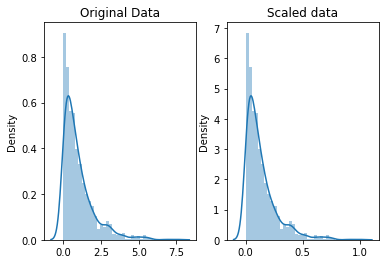

In [ ]:
scaled_data=minmax_scaling(df2,columns=[0])
fig,ax=plt.subplots(1,2)
sns.distplot(data,ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data,ax=ax[1])
ax[1].set_title("Scaled data")


In [ ]:
from scipy import stats
from sklearn import preprocessing
normalized_data=preprocessing.normalize(df2)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Normalized data')

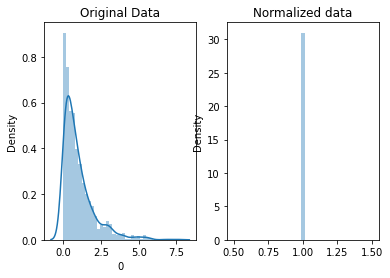

In [ ]:
fig,ax=plt.subplots(1,2)
sns.distplot(df2[0], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data,ax=ax[1])
ax[1].set_title('Normalized data')